## Проект: Обучение с учителем: качество модели

[yandex_practicum](https://practicum.yandex.ru/learn/data-scientist/courses/7003ed02-62c7-4cb8-96de-ac10f3bfb19e/sprints/197574/topics/b1bfd46b-95e3-44a8-81f7-6ef80f70a948/lessons/877ee7f1-972c-420b-bef9-26589625d782/)

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 


<font color='red'>Возможный выход — **удерживать активность постоянных клиентов**. Сделать это можно с помощью персонализированных предложений.</font>

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Стратегия решения

руководитель отдела сформировал ее таким образом:
1) Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: 
    - «снизилась», если клиент стал покупать меньше товаров, 
    - и «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

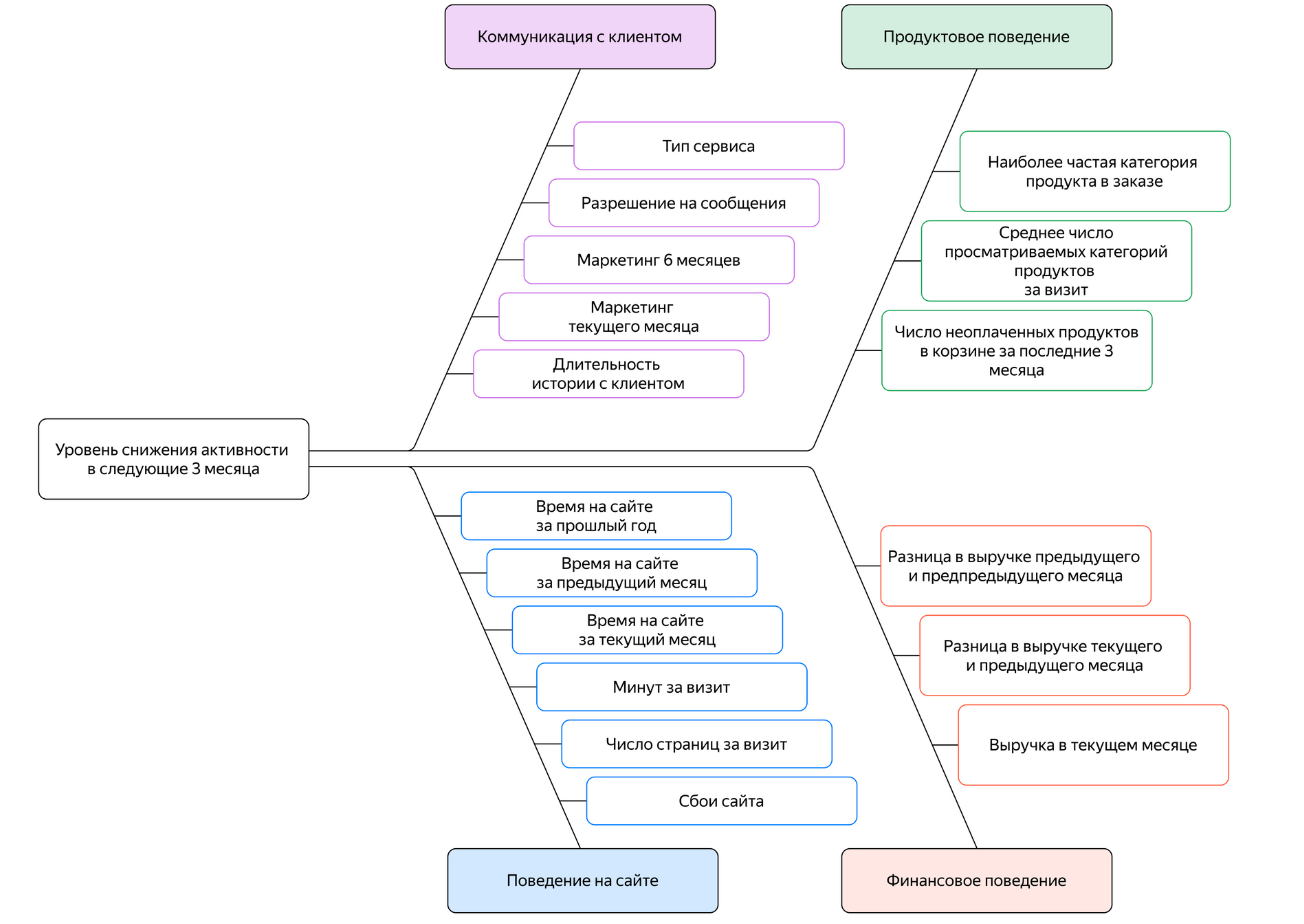

## Последовательность шагов


1) Нужно построить модель, которая предскажет <font color='red'>вероятность снижения покупательской активности клиента в следующие три месяца.</font>

2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой <font color='red'>доход</font> каждый покупатель приносил компании за <font color='red'>последние три месяца.</font>
3) Используя данные модели и данные о прибыльности клиентов, нужно <font color='red'>выделить сегменты покупателей и разработать для них персонализированные предложения.</font>


Предполагаемые сегменты (можно выбрать свои)
- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.

- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.
- и др.

## Описание данных



### <font color='red'>Таблица market_file.csv.</font> 

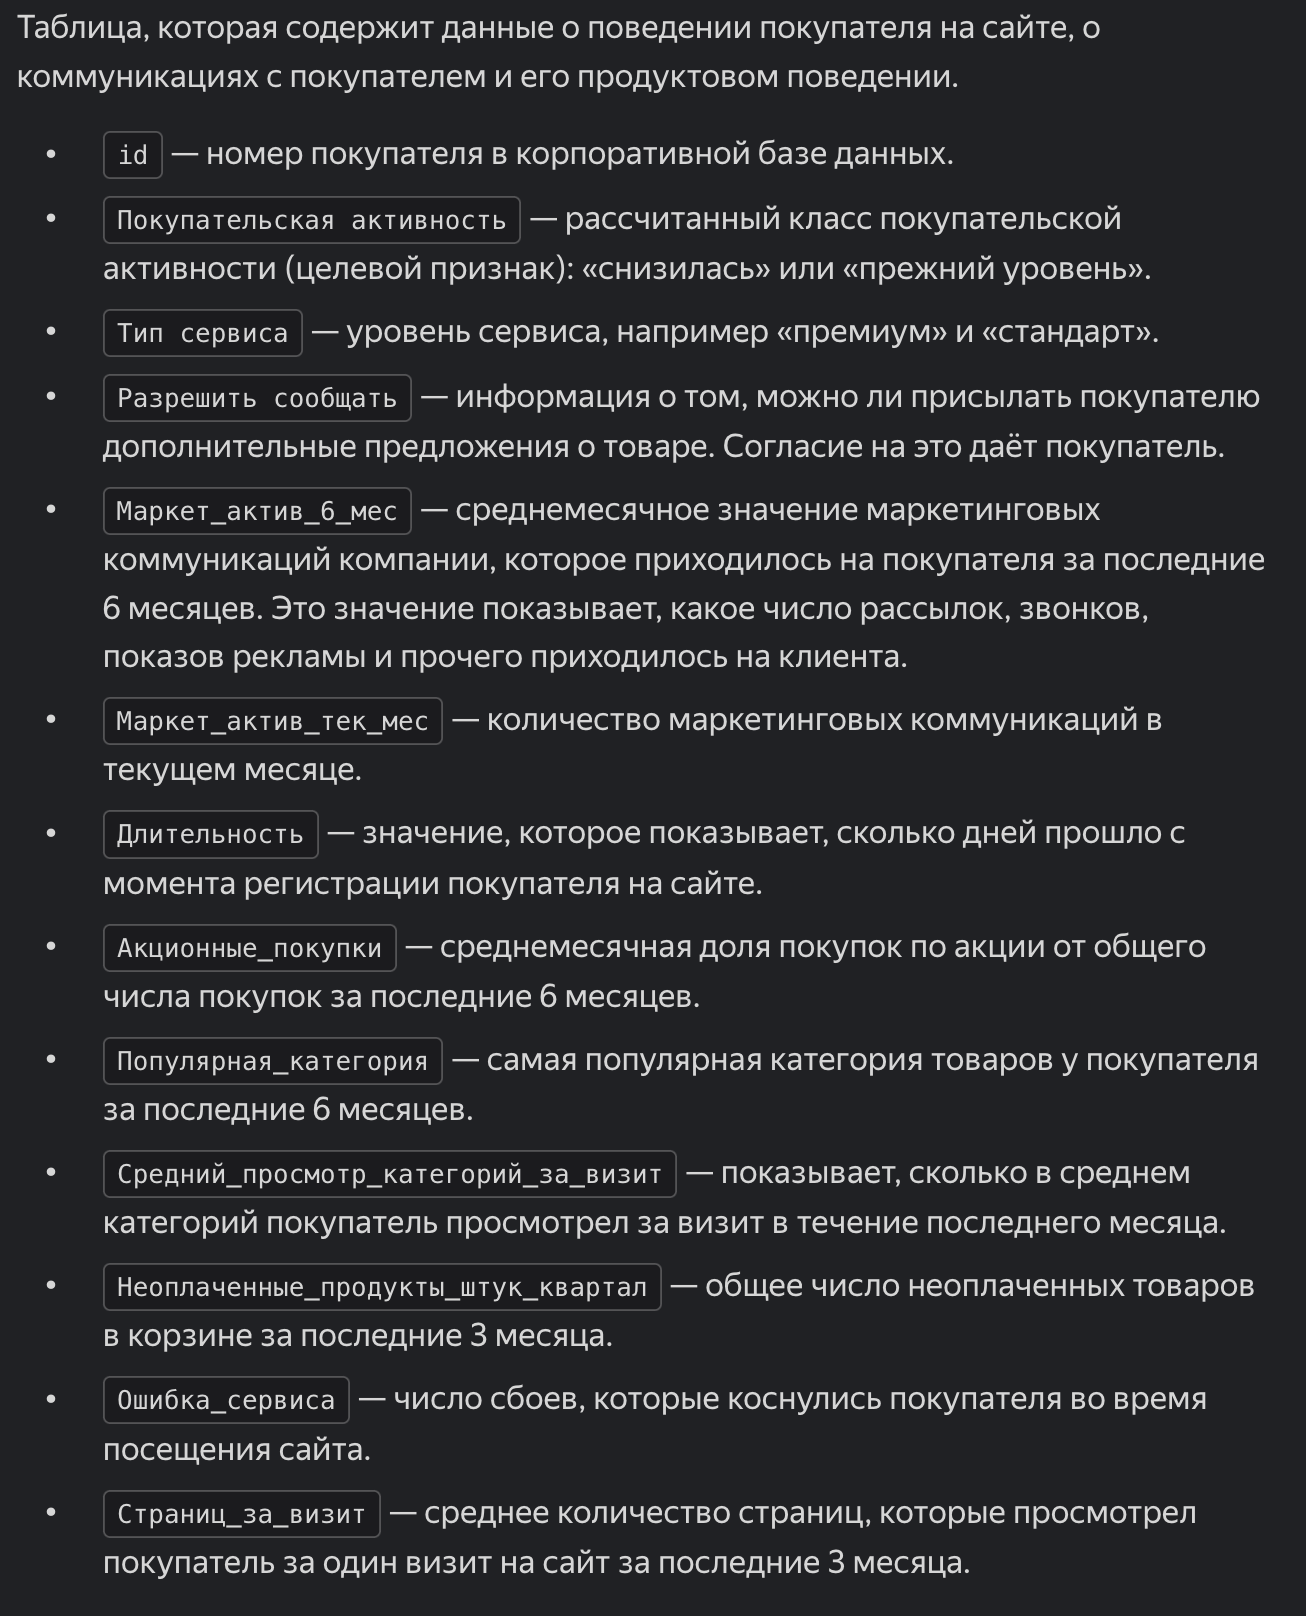

### <font color='red'>Таблица market_money.csv</font>


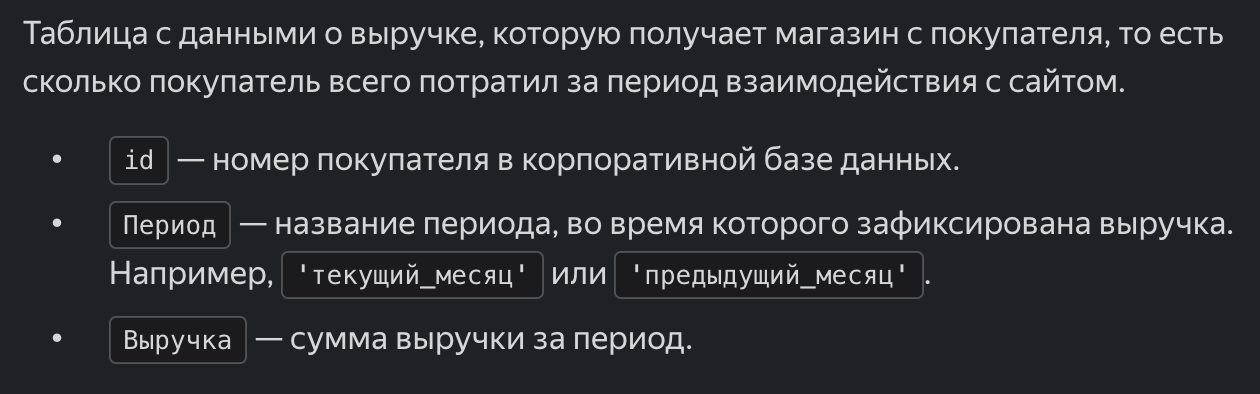

### <font color='red'>Таблица market_time.csv</font>

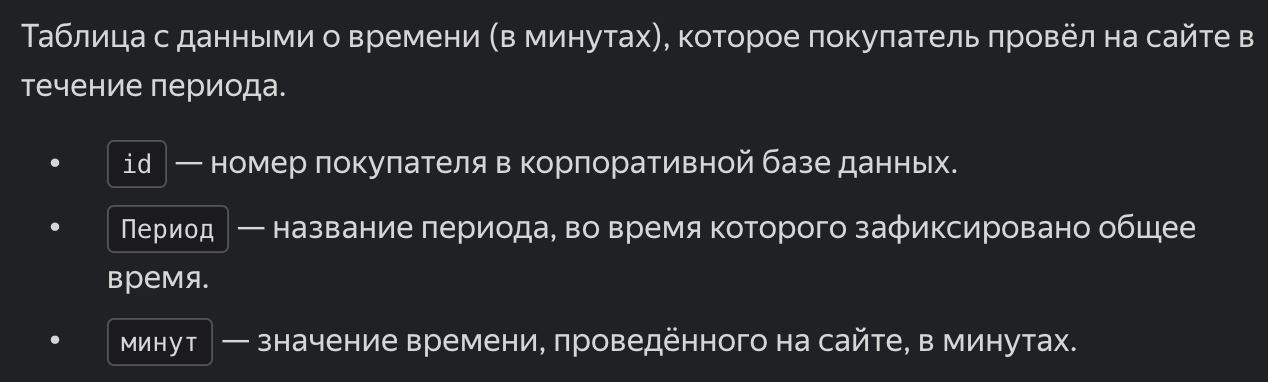


### <font color='red'>Таблица money.csv</font>

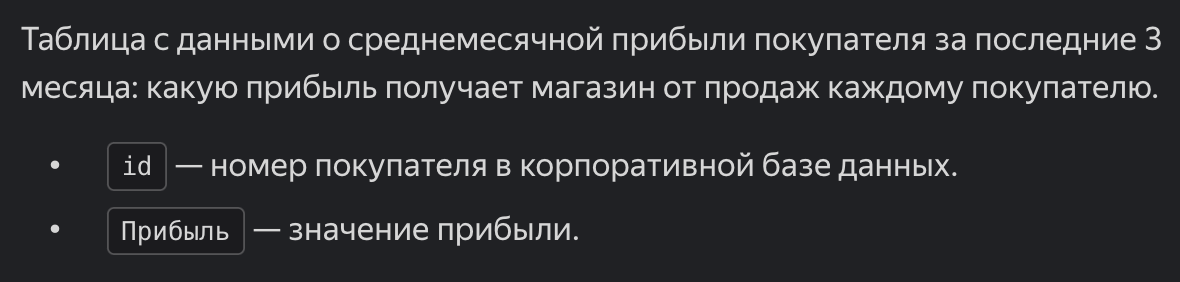


## Работа с проектом

### Шаг 1. Загрузка данных

In [1]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif


# библиотеки для пайплайнов
# класс ColumnTransformer помогает работать с данными разного типа в одном наборе
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score

# библиотека для анализа весов признаков
import shap

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# библиотека для метода опорных векторов
from sklearn.svm import SVC

# библиотека решающих деревьев
from sklearn.tree import DecisionTreeClassifier


# бибилиотека для графика ROC-кривой и расчёта ROC-AUC
from sklearn.metrics import roc_auc_score, RocCurveDisplay


# библиотека для модели классификации kNN 
from sklearn.neighbors import KNeighborsClassifier

# добавим библиотеку для построения scatter диаграмм рассеяния с тренд-линиями
import plotly.express as px 
import plotly.graph_objects as go

import math

In [2]:
try:
    market_df = pd.read_csv('/datasets/market_file.csv')
    market_money_df = pd.read_csv('/datasets/market_file.csv')
    market_time_df = pd.read_csv('/datasets/market_file.csv')
    money_df= pd.read_csv('/datasets/market_file.csv', sep=';',decimal=',')

except FileNotFoundError:
    market_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/market_file.csv')
    market_money_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/market_money.csv')
    market_time_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/market_time.csv')
    money_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/money.csv', sep=';',decimal=',')


In [3]:
market_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
market_time_df.head() 

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Шаг 2. Предобработка данных


#### 2.1 Таблица market_df

In [7]:
market_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [8]:
market_df.shape

(1300, 13)

In [9]:
market_df.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Создадим словарь перевода названий столбцов в стандарт

In [10]:
col_name_dict = {
    'id': 'id', 
    'Покупательская активность': 'consum_activity', 
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'is_allow_report',
    'Маркет_актив_6_мес': 'market_activ_6_mon', 
    'Маркет_актив_тек_мес': 'market_activ_cur_mon', 
    'Длительность': 'duration',
    'Акционные_покупки': 'promo', 
    'Популярная_категория': 'pop_cat_goods',
    'Средний_просмотр_категорий_за_визит': 'mean_view_cat_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_goods_per_quater', 
    'Ошибка_сервиса': 'serv_error',
    'Страниц_за_визит': 'webpage_per_visit'
}

In [11]:
market_df.rename(columns=col_name_dict, inplace=True)

In [12]:
market_df.columns

Index(['id', 'consum_activity', 'service_type', 'is_allow_report',
       'market_activ_6_mon', 'market_activ_cur_mon', 'duration', 'promo',
       'pop_cat_goods', 'mean_view_cat_per_visit', 'unpaid_goods_per_quater',
       'serv_error', 'webpage_per_visit'],
      dtype='object')

In [13]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   consum_activity          1300 non-null   object 
 2   service_type             1300 non-null   object 
 3   is_allow_report          1300 non-null   object 
 4   market_activ_6_mon       1300 non-null   float64
 5   market_activ_cur_mon     1300 non-null   int64  
 6   duration                 1300 non-null   int64  
 7   promo                    1300 non-null   float64
 8   pop_cat_goods            1300 non-null   object 
 9   mean_view_cat_per_visit  1300 non-null   int64  
 10  unpaid_goods_per_quater  1300 non-null   int64  
 11  serv_error               1300 non-null   int64  
 12  webpage_per_visit        1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


пропусков нет, смотрим на дубликаты - явные и неявные

In [14]:
market_df.duplicated().sum()

0

In [15]:
# запускаем цикл на проверку содержимого категориальных столбцов - ищем уникальные названия

for col in market_df.select_dtypes(exclude='number').columns.tolist():
    print(f'{col} : {market_df[col].unique()}')
    print()
    

consum_activity : ['Снизилась' 'Прежний уровень']

service_type : ['премиум' 'стандартт' 'стандарт']

is_allow_report : ['да' 'нет']

pop_cat_goods : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



In [16]:
market_df.loc[market_df.service_type== 'стандартт', "service_type"]= 'стандарт'

In [17]:
market_df.service_type.unique()

array(['премиум', 'стандарт'], dtype=object)

In [18]:
market_df.duplicated().sum()

0

Вывод: с дубликатами разобрались, ошибку устранили. пропусков в датасете нет

#### 2.2 Таблица market_money

In [19]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [20]:
market_money_df.shape

(3900, 3)

In [21]:
market_money_df['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Трансфоримруем таблицу для получения информации о выручке для каждого из периодов

In [22]:
market_money_df_tr = market_money_df.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum').reset_index()
market_money_df_tr.columns.name = None
market_money_df_tr.columns = ['id', 'last_last_rev', 'last_rev', 'current_rev']

market_money_df_tr.head()

,id,last_last_rev,last_rev,current_rev
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


In [23]:
market_money_df_tr.shape

(1300, 4)

In [24]:
market_money_df_tr.duplicated().sum()

0

In [25]:
market_money_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1300 non-null   int64  
 1   last_last_rev  1300 non-null   float64
 2   last_rev       1300 non-null   float64
 3   current_rev    1300 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.8 KB


Теперь размер выборки совпадает с размером market_df, а данные в столбцах отражают выручку за каждый период

дубликатов в таблице нет, пустых значений тоже

#### 2.3 Таблица market_time

In [26]:
market_time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [27]:
market_time_df.shape

(2600, 3)

In [28]:
market_time_df['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

проведем ту же операцию по трансформации:
- разобьем периоды на текущий и предыдущий месяцы
- в значения столбцов попадут количество минут, проведенных пользователем на сайте 

In [29]:
market_time_df.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()

Период,id,предыдцщий_месяц,текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


In [30]:
market_time_df_tr = market_time_df.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()
market_time_df_tr.columns.name = None
market_time_df_tr.columns = ['id', 'last_dur_minutes', 'current_dur_minutes']

market_time_df_tr.head()

,id,last_dur_minutes,current_dur_minutes
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [31]:
market_time_df_tr.shape

(1300, 3)

In [32]:
market_time_df_tr.duplicated().sum()

0

In [33]:
market_time_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   1300 non-null   int64
 1   last_dur_minutes     1300 non-null   int64
 2   current_dur_minutes  1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


Теперь размер выборки совпадает с размером market_df, а данные в столбцах отражают длительность нахождения на сайте за каждый период

дубликатов в таблице нет, пустых значений тоже

#### 2.4 Таблица money

In [34]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [35]:
money_df.shape

(1300, 2)

In [36]:
money_df.duplicated().sum()

0

In [37]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


дубликатов, пустых значений в таблице нет

### Шаг 3. Исследовательский анализ данных


Создадим 4 функции:

- вытягивания имени из переменной (для корректного наименования графиков)
- построения гистограммы и boxplot для количественных признаков
- построения столбчатых диаграмм для категориальных признаков

- сборная функция построения всей аналитики для любого датасета

In [38]:
# функция получения имени переменной

def get_var_name(var, caller_locals):
    import inspect
    for name, value in caller_locals.items():
        if value is var:
            return name
    return None

In [39]:
# функция для построения гистограммы и boxplot для любого столбца любого датафрейма

def plot_hist_boxplot(some_df, col, col_name, dataset_name):

    df_for_plot= some_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значения признака {col_name}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'Значение признака {col_name}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        

In [40]:
# функция построения столбчатой диаграммы

def barplot_df(dataset, col, col_name, dataset_name):
    dataset[col].value_counts().plot(kind='bar', legend=True, figsize=(10,5))
    plt.title(f'Диаграмма частоты признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значение признака {col_name}')
    plt.ylabel(f'Частота признака {col_name}')
    plt.show()

    

In [41]:
# функция получения аналитических данных для любой таблицы

def analysis_df(some_df: pd.DataFrame):
    # блок вытягивания имени
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals

    dataset_name = get_var_name(some_df, caller_locals)
    

    print(f'Статистический анализ таблицы {dataset_name}')  # печатаем имя таблицы (из переменной)
    display(some_df.describe().T)

    # блок построения гистограмм и диаграмм

    cat_col_list = some_df.select_dtypes(exclude='number').columns.tolist()
    num_col_list = some_df.select_dtypes(include='number').columns.tolist()
    
    dict_names = {v: k for k,v in col_name_dict.items()}

    for col in num_col_list:
        plot_hist_boxplot(some_df=some_df, col_name=col, col=col, dataset_name=dataset_name)

    for col in cat_col_list:   # для категориальных столбцов
        try:
            barplot_df(dataset=some_df, col_name=col, col=col, dataset_name=dataset_name)
        except KeyError:
            continue

Запускаем цикл по нашим таблицам

Статистический анализ таблицы market_df


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
market_activ_6_mon,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
market_activ_cur_mon,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
duration,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
promo,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
mean_view_cat_per_visit,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
unpaid_goods_per_quater,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
serv_error,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
webpage_per_visit,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


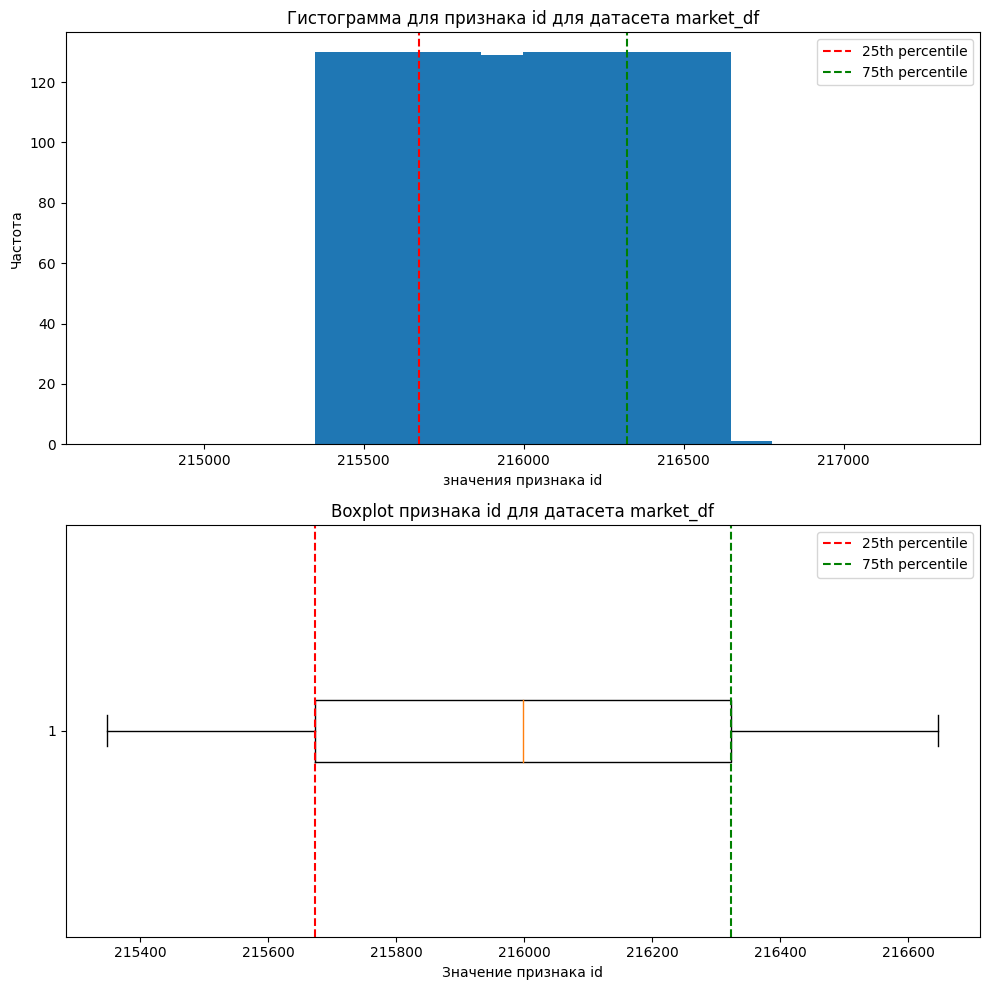

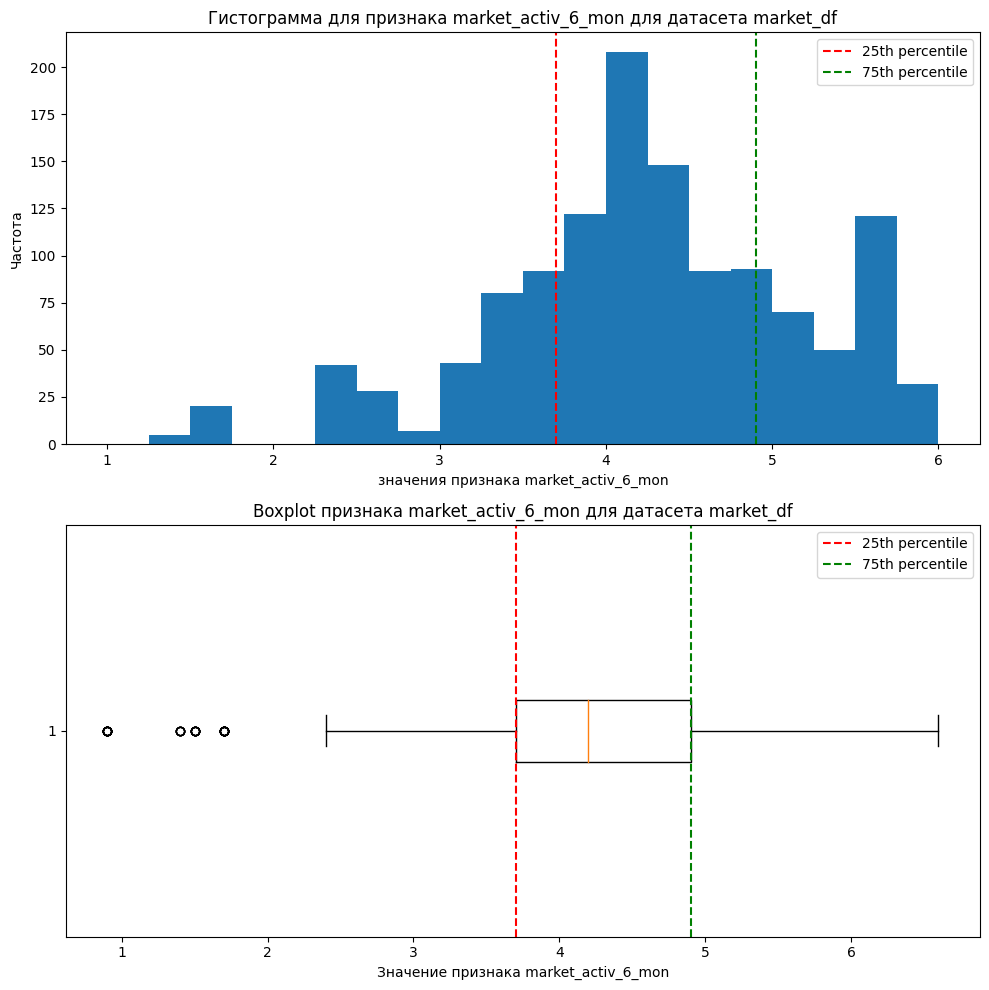

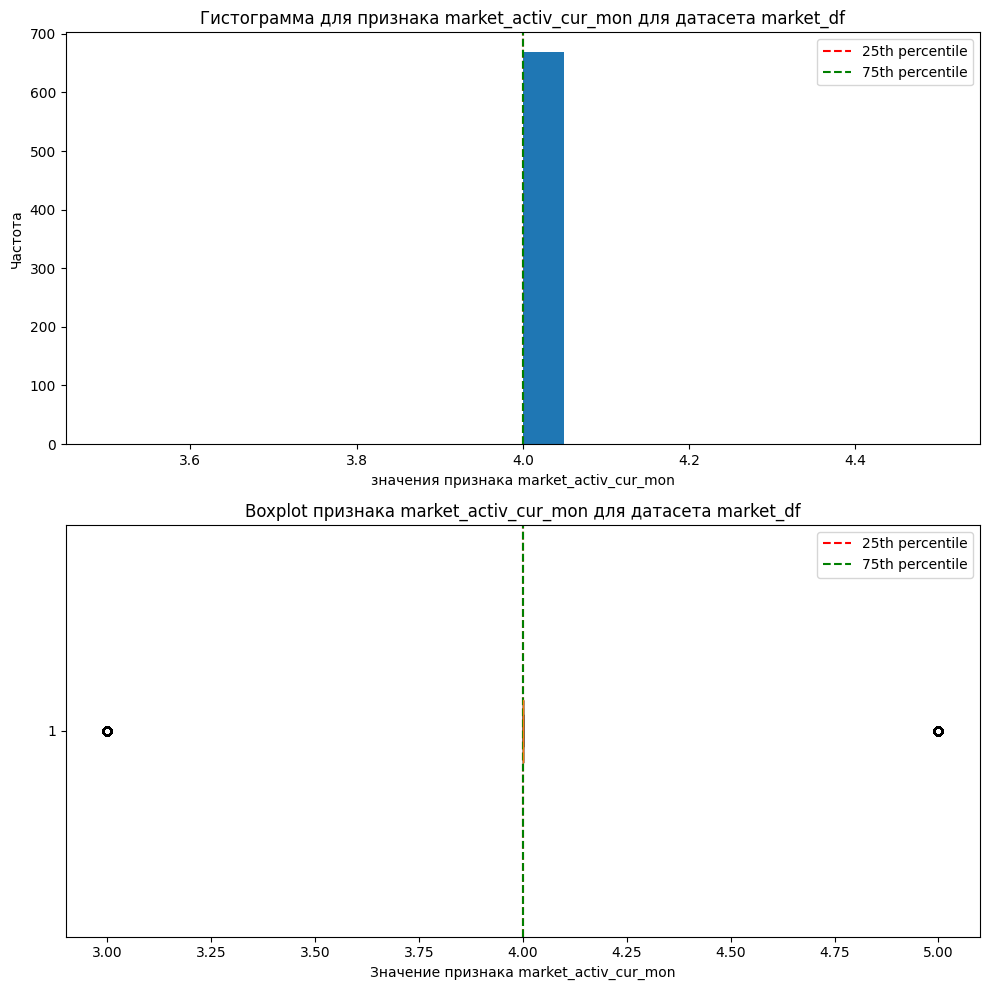

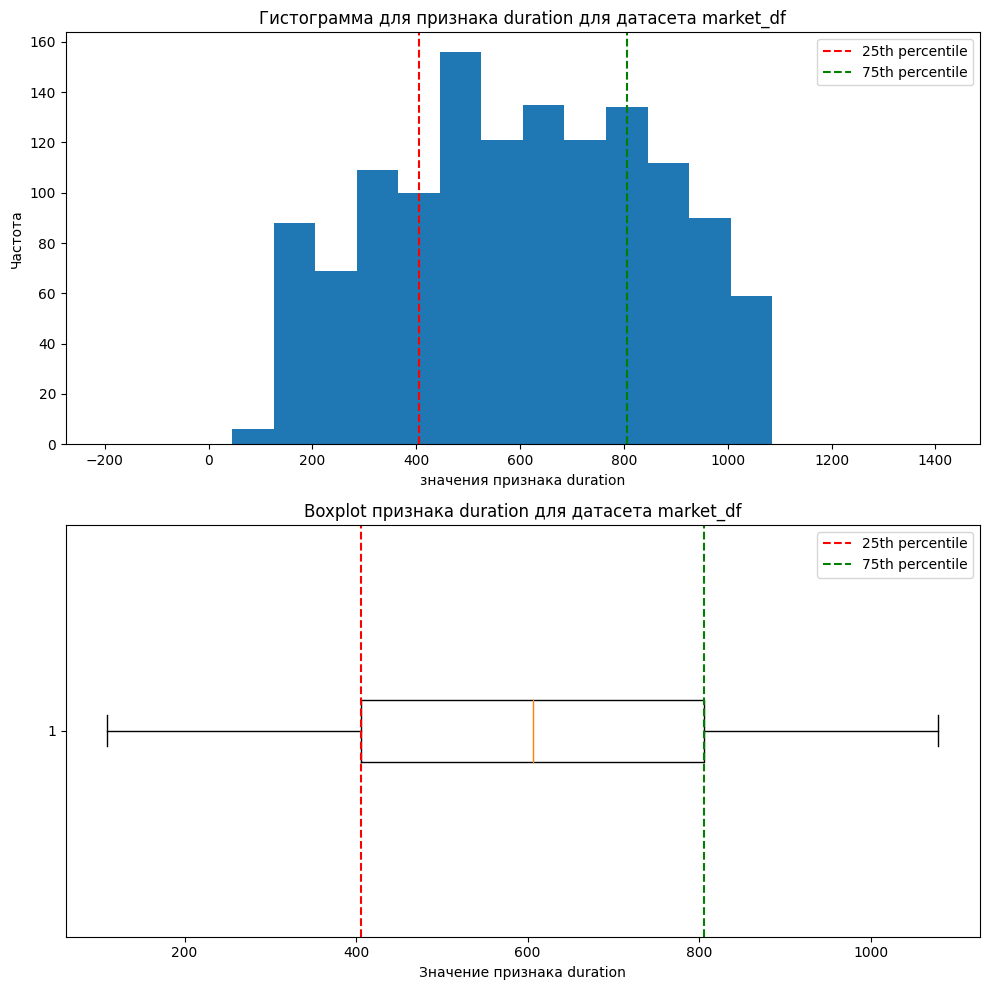

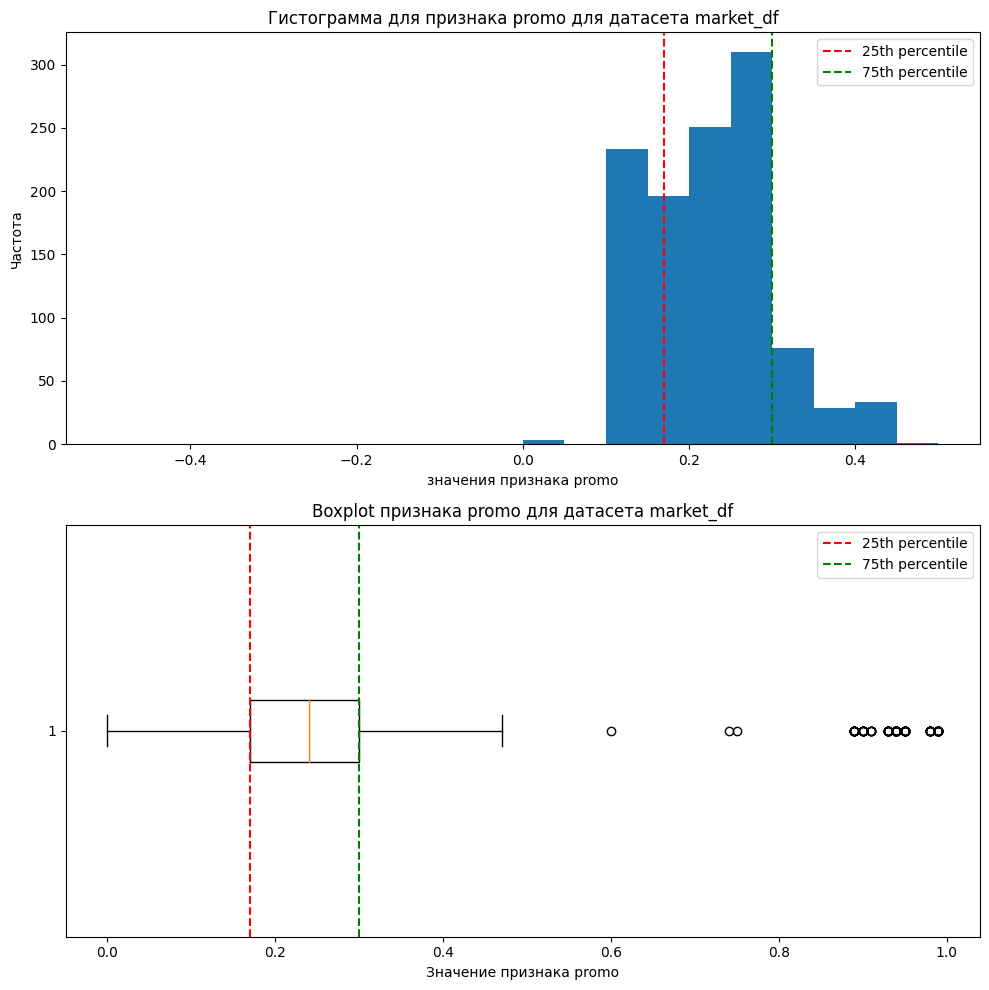

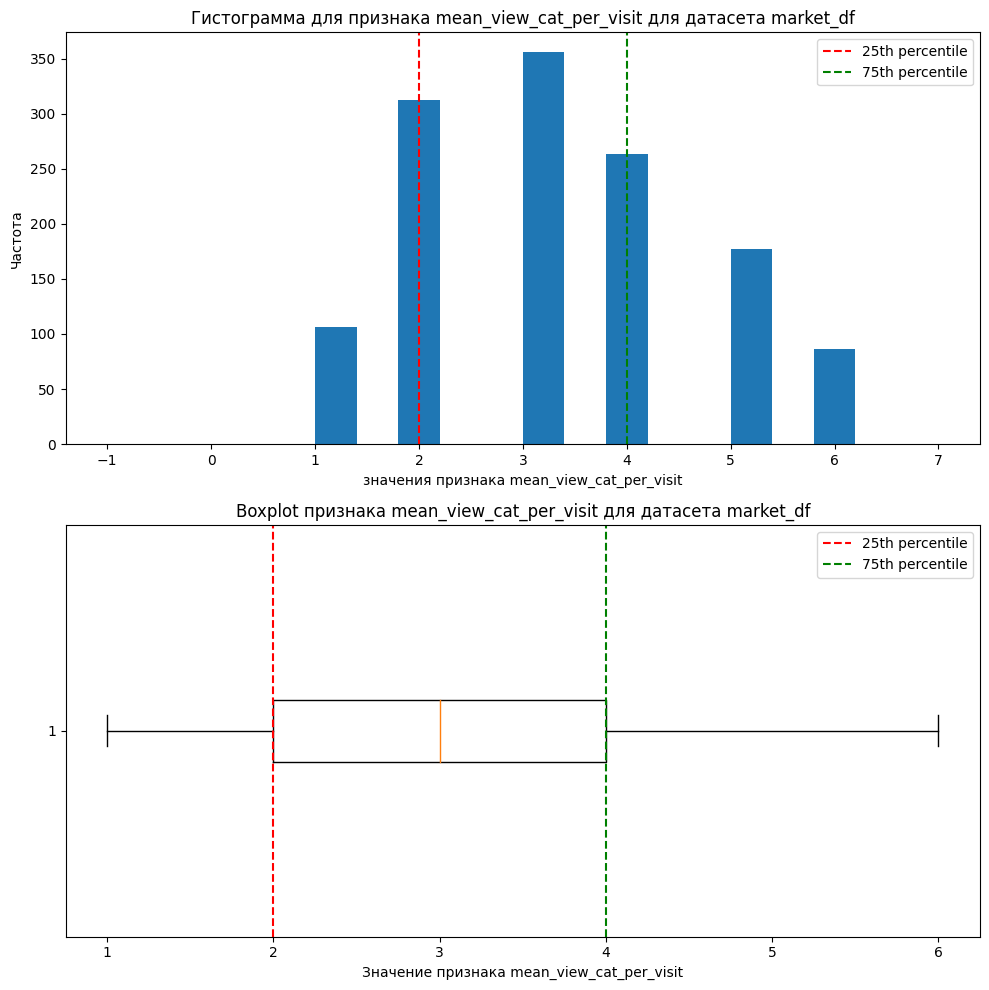

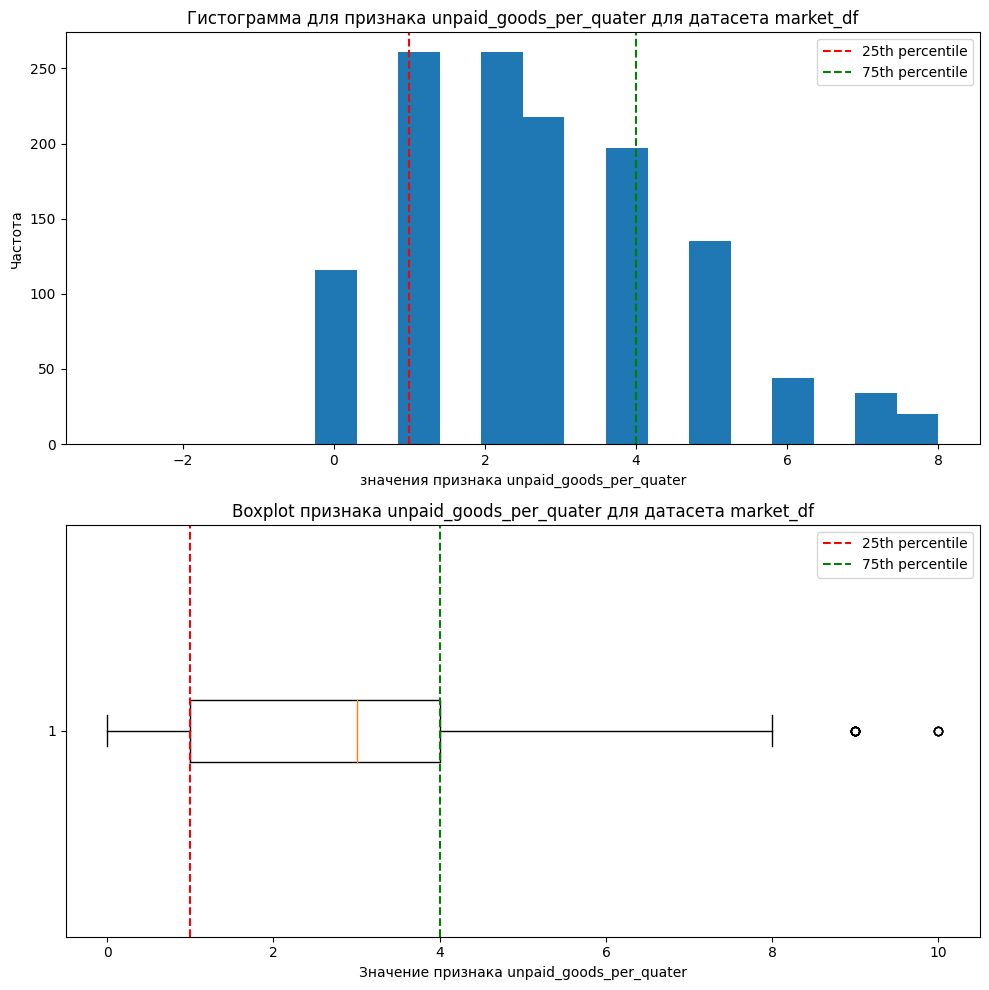

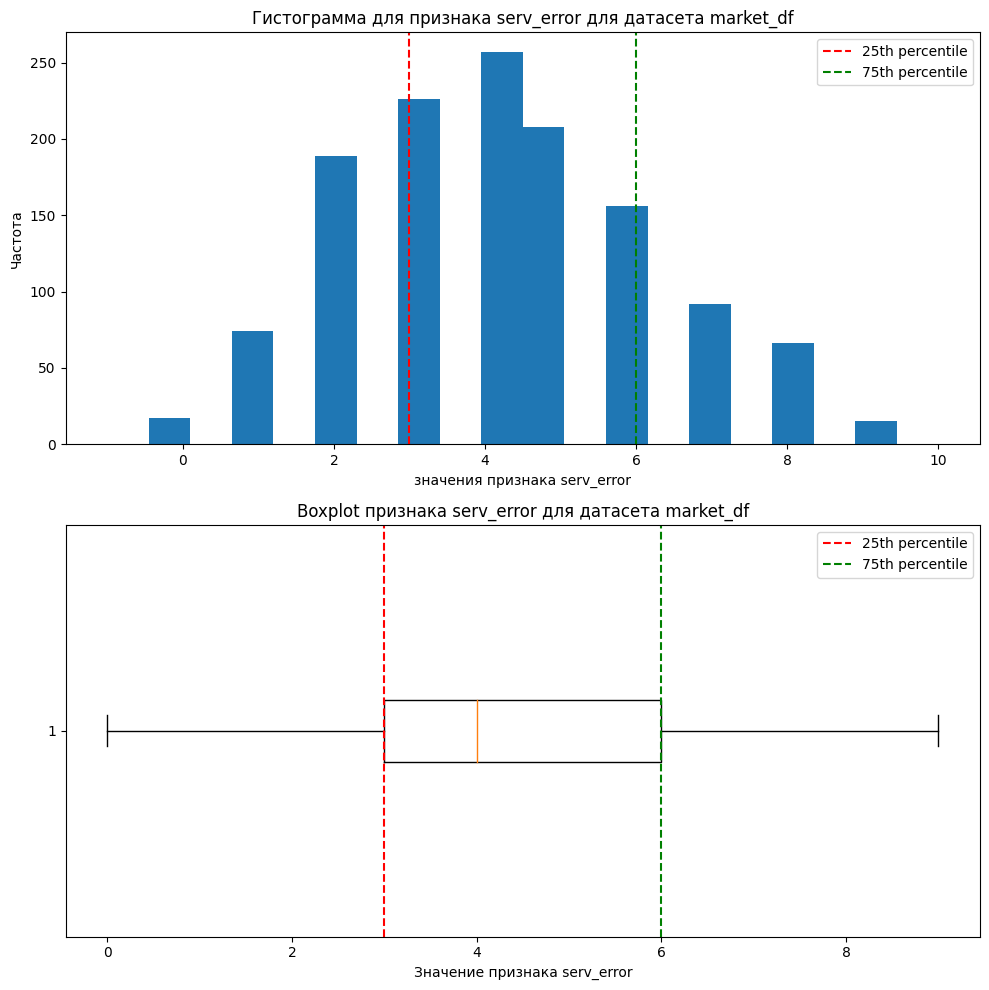

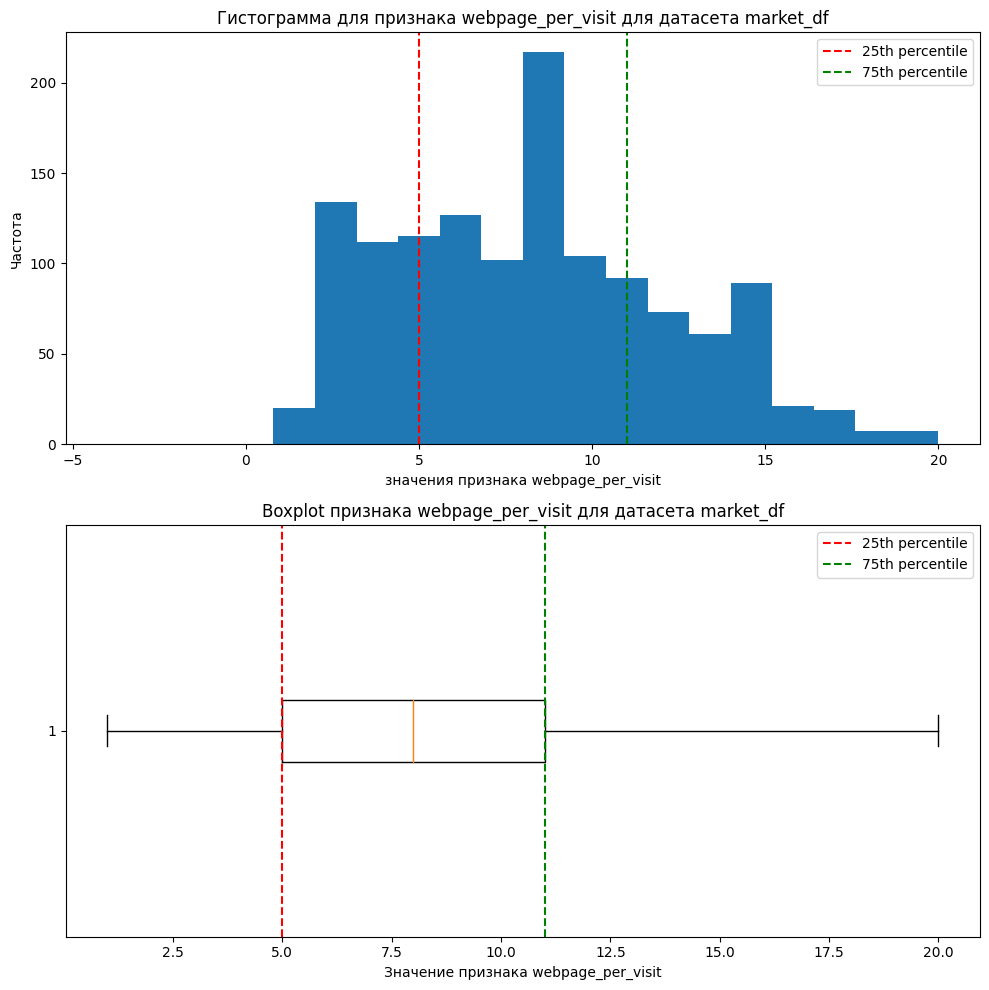

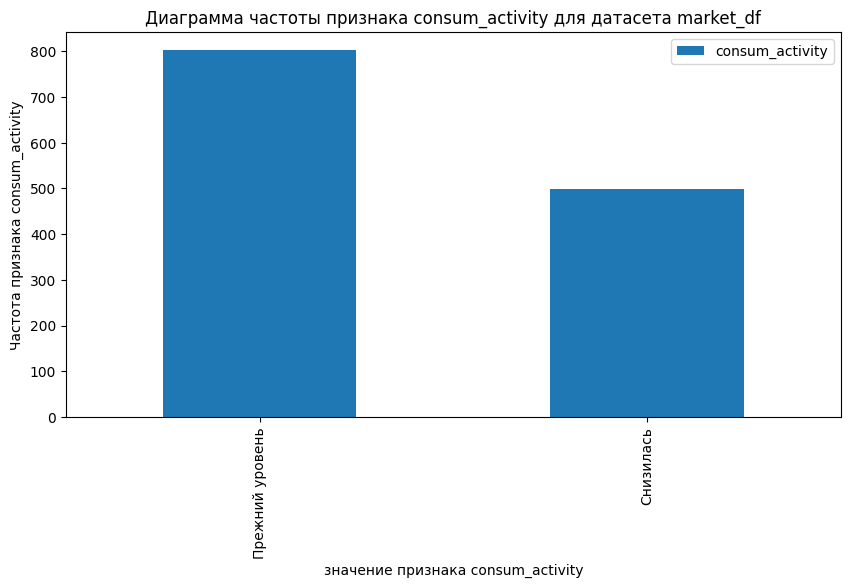

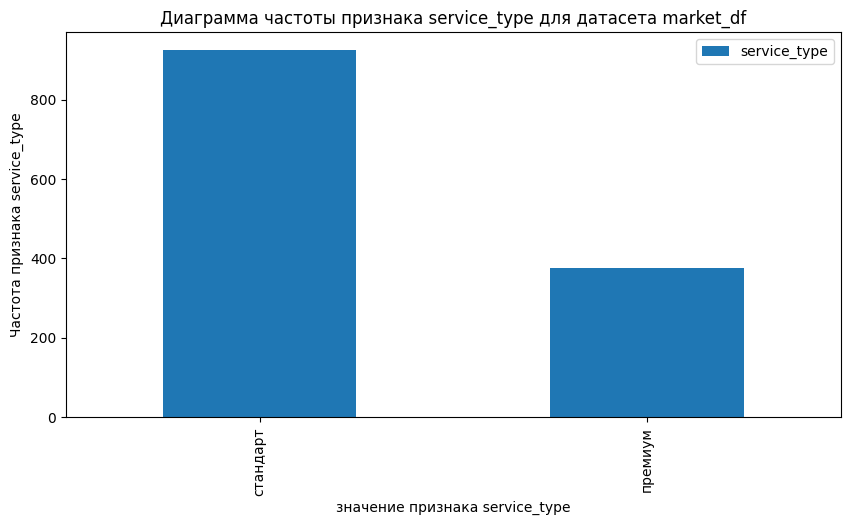

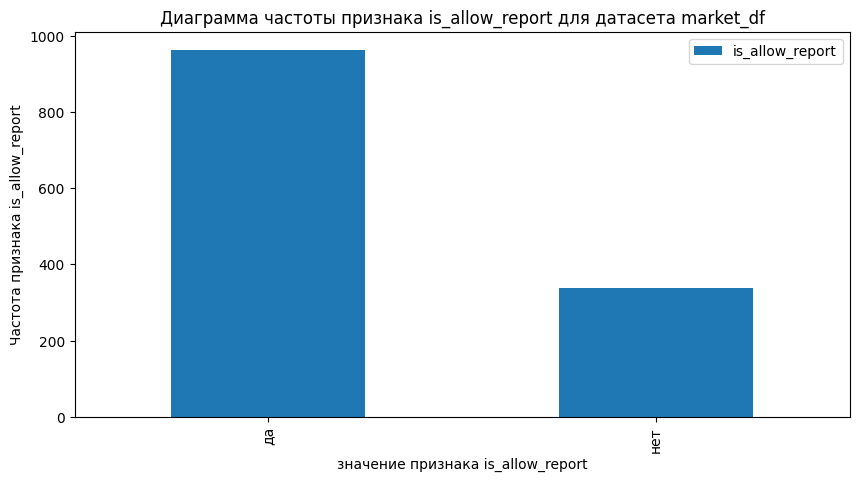

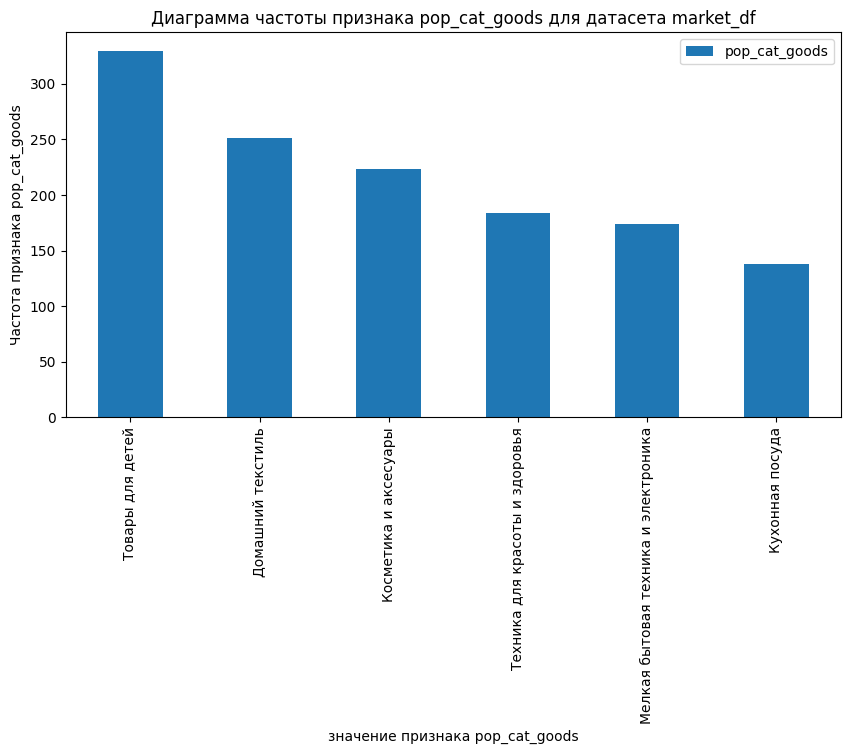




Статистический анализ таблицы market_money_df_tr


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.250,216647.0
last_last_rev,1300.0,4936.920385,739.597997,0.0,4496.75,5005.00,5405.625,6869.5
last_rev,1300.0,4825.206923,405.979663,0.0,4583.00,4809.00,5053.500,5663.0
current_rev,1300.0,5314.960846,2939.708156,2758.7,4706.05,5179.95,5761.725,106862.2


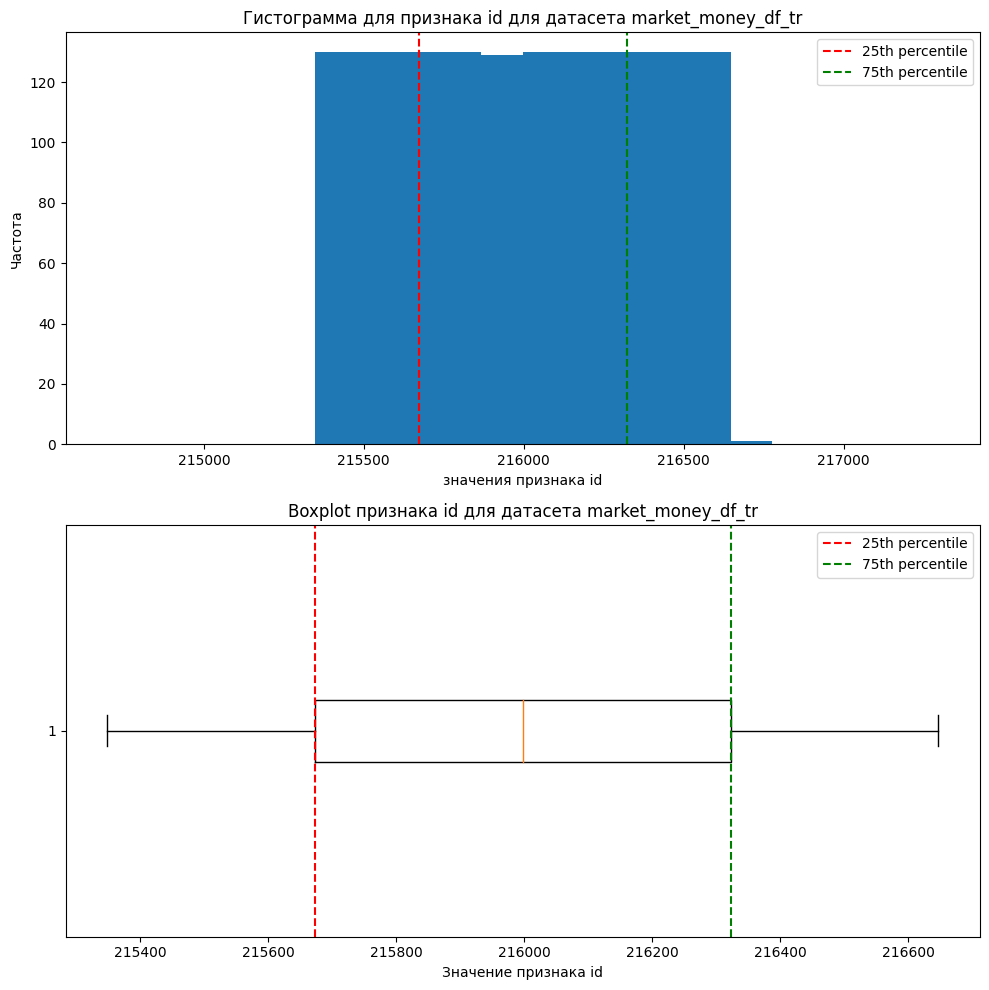

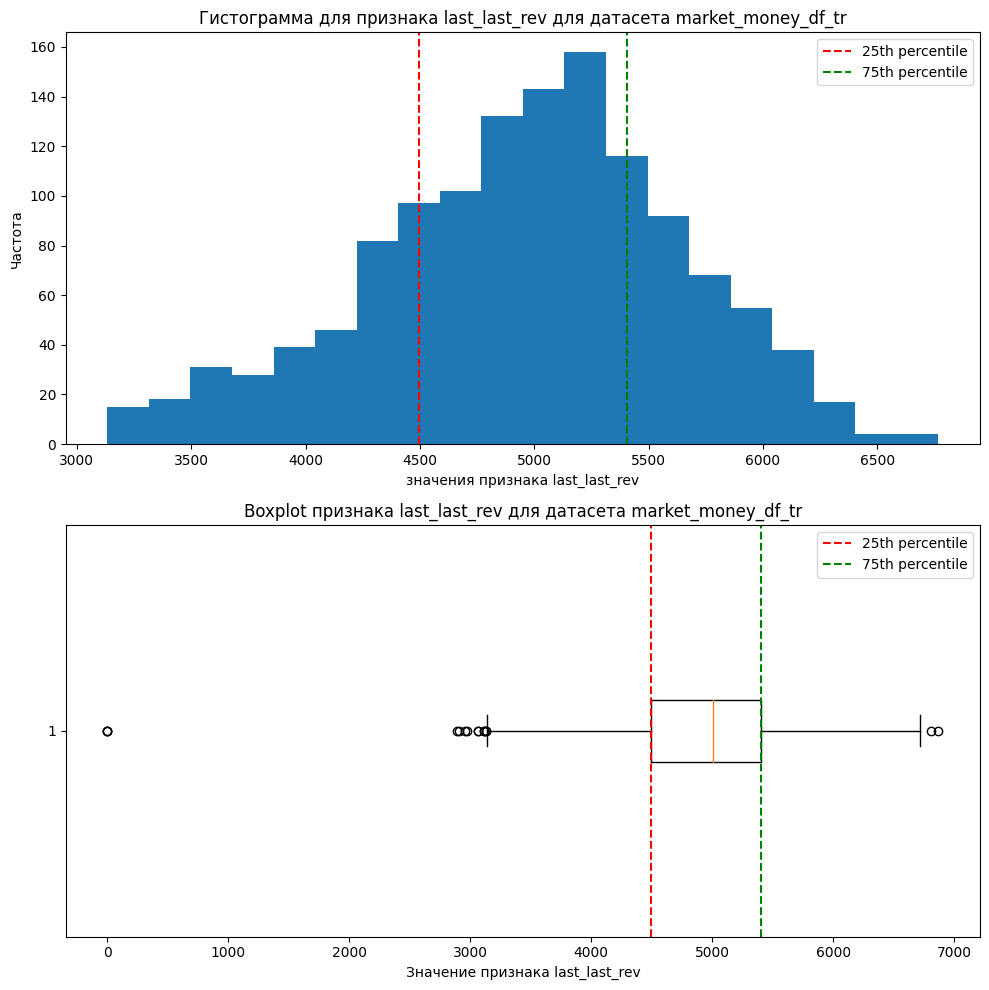

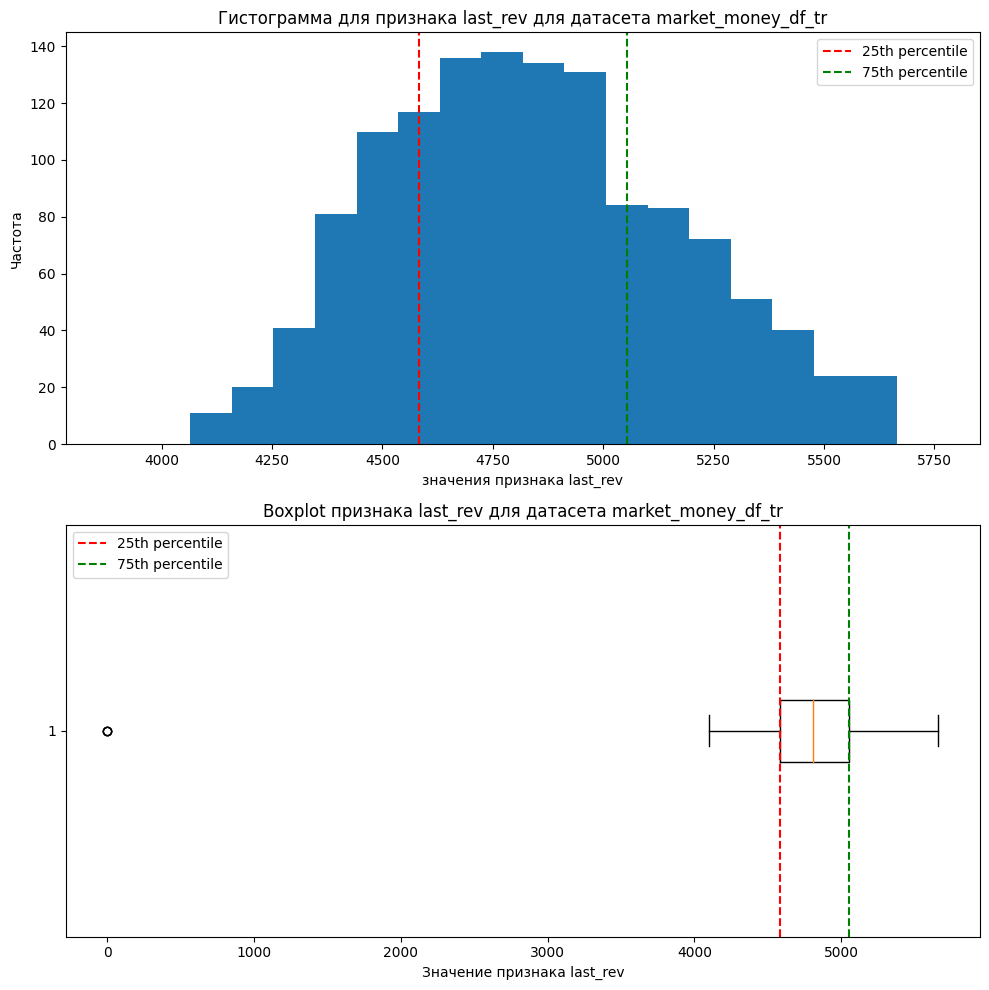

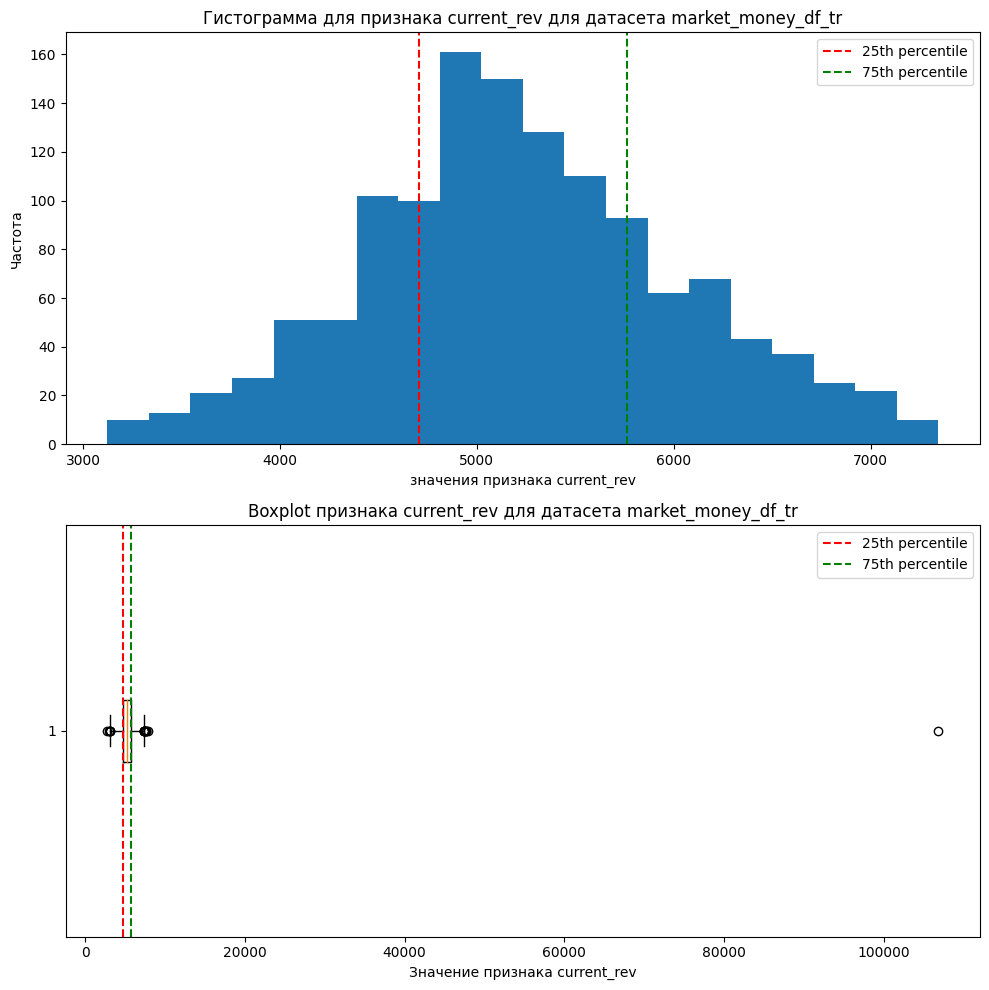




Статистический анализ таблицы market_time_df_tr


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.5,216322.25,216647.0
last_dur_minutes,1300.0,13.467692,3.932029,5.0,11.00,13.0,17.00,23.0
current_dur_minutes,1300.0,13.204615,4.220589,4.0,10.00,13.0,16.00,23.0


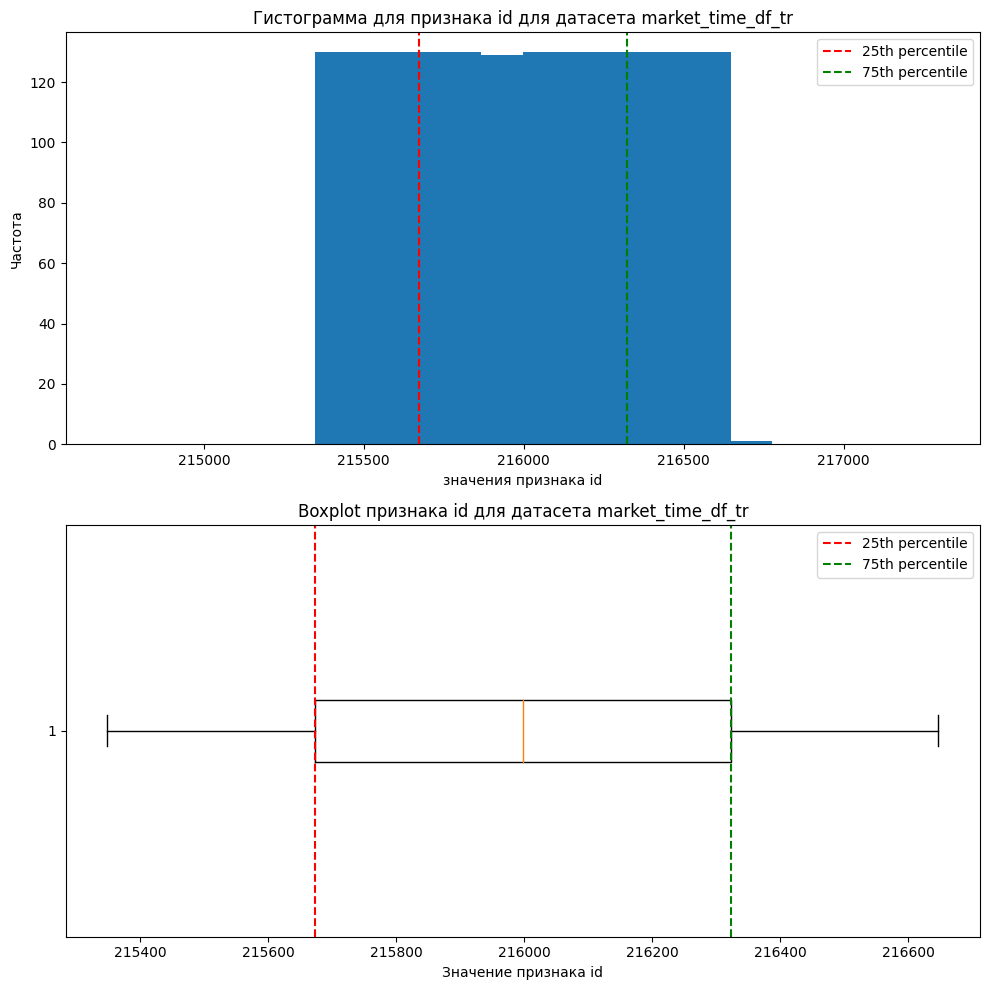

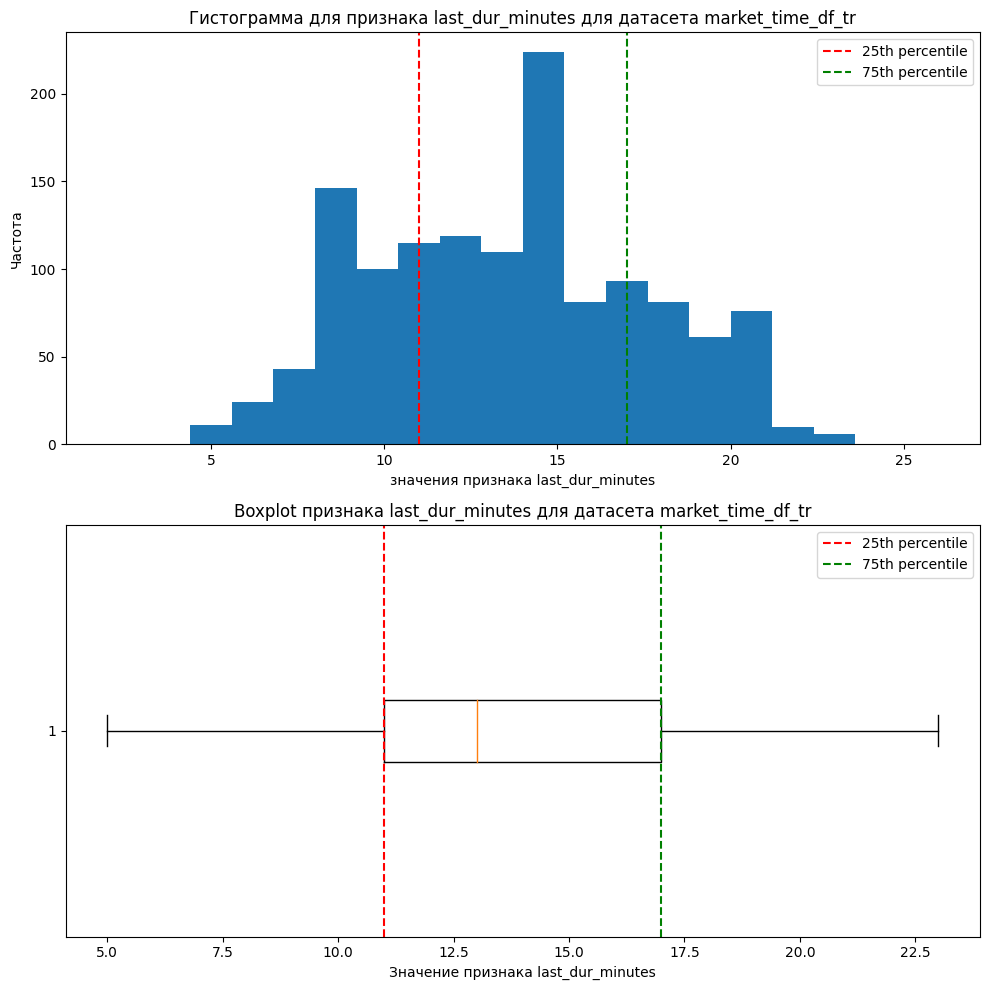

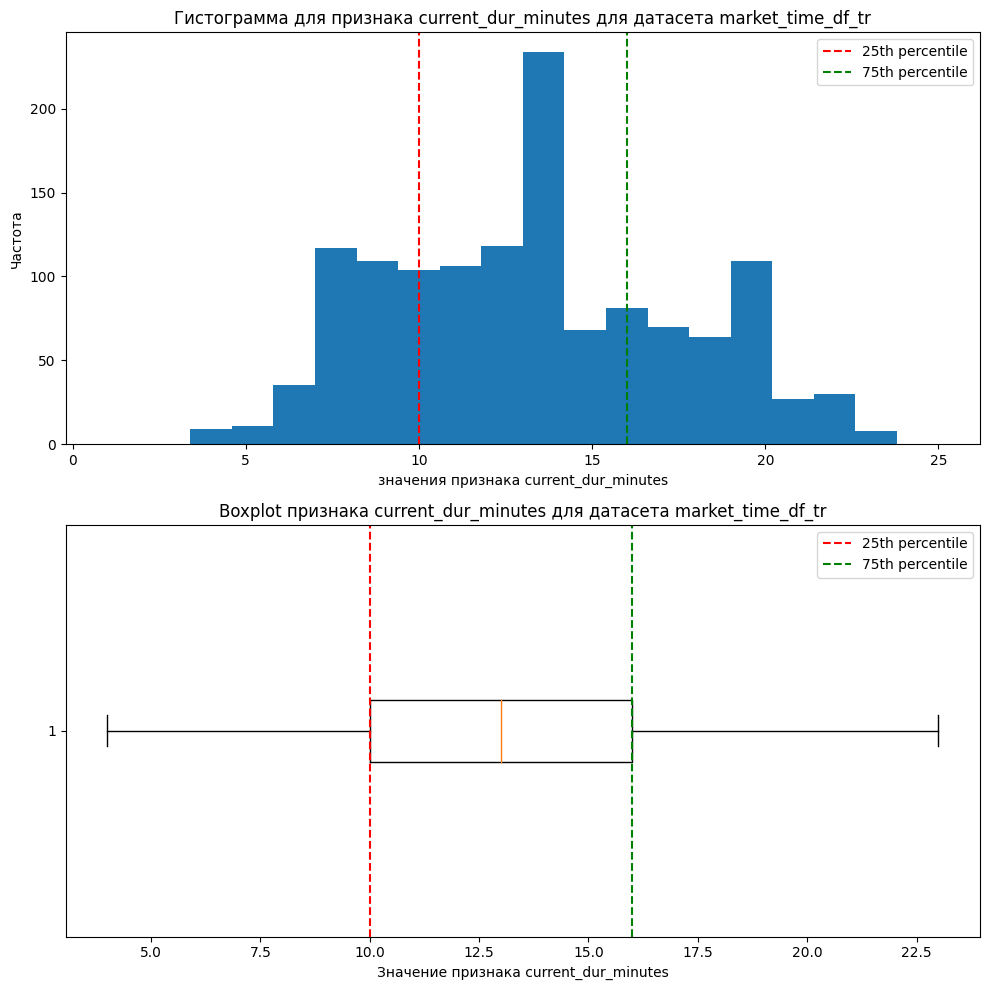




Статистический анализ таблицы money_df


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


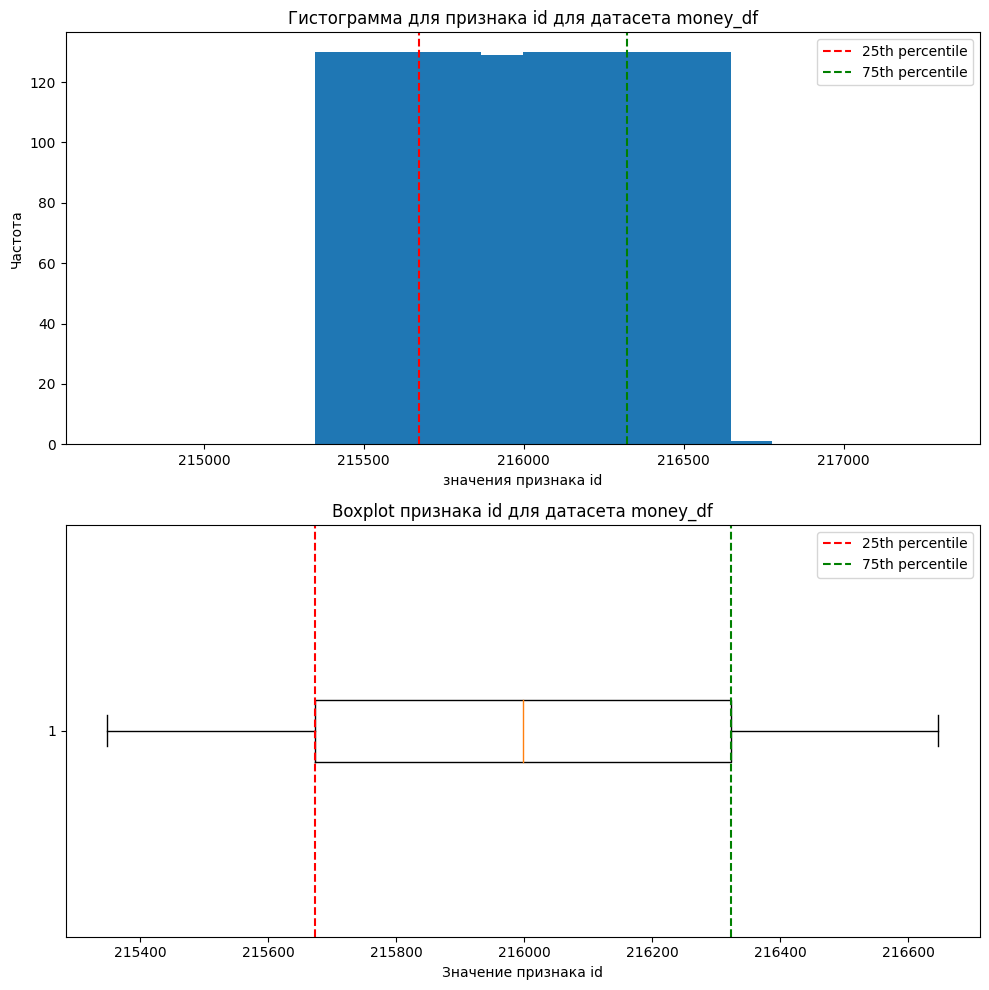

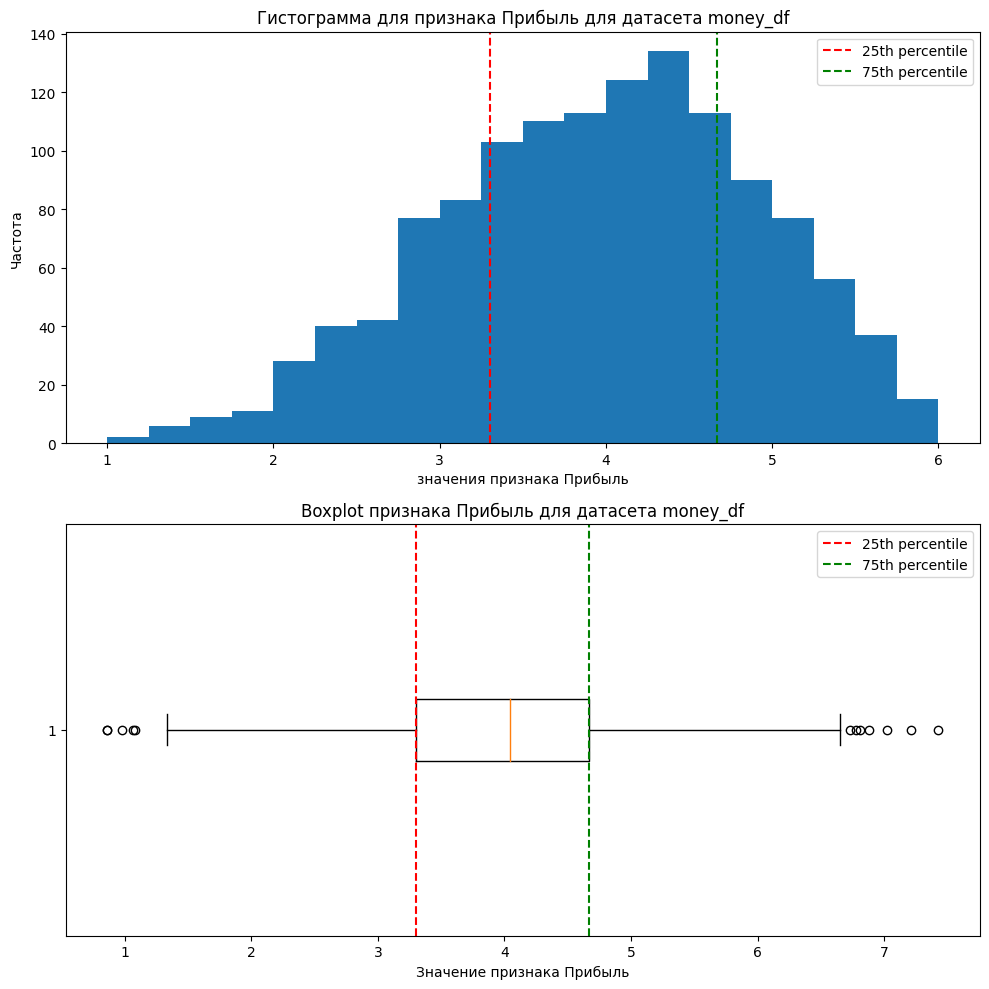

In [42]:
for dataset in [market_df, market_money_df_tr, market_time_df_tr, money_df]:
    analysis_df(dataset)
    print('\n\n')

Выводы:

1) Таблица market_df:
    - среднемесячная маркетинговая активность за последние 6 месяцев распределена нормально, в основном  4 раза в месяц. В редких случаях - 1-2 раза (за границами межквартильного размаха - выбросы). Значит всем клиентам (звонки, рассылки и пр) уделяется по 4 мероприятия в месяц.

    - маркетинговая активность в текущем месяце - строго 4

    - количество дней с момента регистрации пользователя тоже распределено нормально, половина всех пользователей зарегистрировалась от 400 до 800 дней назад (или от 1 года до 2,5 лет назад)

    - доля акционных покупок в месяц смещена вправо. Половина всех значений лежит от 19 до 25%, Нормально считается, если 50% товаров пользователь покупает не по акции (или по акции).  Однако встречаются выбросы - у некоторых покупателей доля покупок по акции составляет от 60 до 100%. Их нужно будет отсмотреть отдельно

    - средний просмотр категорий за визит пользователем - чаще всего 3. Основной набор - от 2 до 5

    - неоплаченные продукты за квартал - в основном от 1 до 5 товаров. Выбросы - более 8 товаров.

    - число сбоев, которые коснулись покупателя во время покупок - 50% пользователей испытывают от 3 до 6. 

    - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца. - половина пользователей посещает от 5 до 11 страниц, Нормальным считается посещение от 2 до 20 страниц. Самое частое значение - 8 страниц за один визит на сайт

    - по активности пользователей за последние три месяца - у 40% активность снизилась

    - 30% клиентов из сектора премиум сервиса

    - 30% клиентов не дали согласия на получение рассылок

    - наиболее популярные товары у покупателей это Товары для детей и домашний текстиль. наименее популярные - мелкая быт техника и посуда

2) Таблица market_money_df:
    - прибыль за пред-предпоследний, предпоследний и последний месяцы распределена нормально
    - самая популярная выручка в месяц - в пределах от 4800 до 5200
    - есть несколько значений выбросов - менее 3000 и более 7000 в месяц

3) Таблица market_time_df_tr:
    - проведенное время на сайте за период прошлого и текущего месяца - лежит в границах от 5 до 23 минут
    - половина всех пользователей проводят от 10 до 17 минут, чаще всего - 13 минут

4) Таблица money_df:
    - среднемесячная прибыль с каждого покупателя лежит в пределах от 1,5 до 6,5 - остальное уже выбросы
    - половина покупателей приносит магазину прибыль от 3.3 до 4.7 , чаще всего  - 4 

### Шаг 4. Объединение таблиц

Мерджим таблицы market_file.csv, market_money.csv, market_time.csv. 

In [43]:
df_market=  market_df.merge(market_money_df_tr, how='left', on='id')\
    .merge(market_time_df_tr, how='left', on='id')

In [44]:
df_market.head()

,id,consum_activity,service_type,is_allow_report,market_activ_6_mon,market_activ_cur_mon,duration,promo,pop_cat_goods,mean_view_cat_per_visit,unpaid_goods_per_quater,serv_error,webpage_per_visit,last_last_rev,last_rev,current_rev,last_dur_minutes,current_dur_minutes
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [45]:
df_market.shape

(1300, 18)

In [46]:
df_market.columns

Index(['id', 'consum_activity', 'service_type', 'is_allow_report',
       'market_activ_6_mon', 'market_activ_cur_mon', 'duration', 'promo',
       'pop_cat_goods', 'mean_view_cat_per_visit', 'unpaid_goods_per_quater',
       'serv_error', 'webpage_per_visit', 'last_last_rev', 'last_rev',
       'current_rev', 'last_dur_minutes', 'current_dur_minutes'],
      dtype='object')

В итоговой таблице сделали отдельный столбец для каждого периода (по времени проведенному на сайте и по принесенной прибыли)

### Шаг 5. Корреляционный анализ

Создадим функцию построения графиков рассеяния для оценки корреляции между признаками. Целевой признак выступит в качестве разделителя данных

In [106]:
def plot_scatter_for_df(some_df,feat1, feat2, target_feature):

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=feat1, y=feat2, color= target_feature, #symbol=target_feature,
                    title= f'График рассеяния  {feat1} по {feat2} с учетом признака "{target_feature}"',
                    labels={feat1: feat1.capitalize(), feat2: feat2.capitalize()},
                    color_discrete_map={'Снизилась': 'blue', 'Прежний уровень': 'yellow'},  # Цвета точек для двух значений target_feat
    #                symbol_map={'Снизилась': 'circle', 'Прежний уровень': 'square'})  # Формы точек для двух значений target_feat
                    )


    # Фильтруем данные для каждой группы точек
    data_yellow = some_df[some_df[target_feature] == 'Прежний уровень']
    data_blue = some_df[some_df[target_feature] == 'Снизилась']

    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_yellow, 
                            x=feat1, 
                            y=feat2, 
                            trendline='ols',
                            trendline_color_override= 'orange',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=feat1, 
                            y=feat2, 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])


    # Добавляем описание легенды

    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='orange'), 
                                showlegend=True, name=f'линия тренда для {target_feature} = Прежний уровень'))

    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='blue'), 
                                showlegend=True, name=f'линия тренда для {target_feature} = Снизилась'))

    # Перемещаем легенду над графиком
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))


    # Показываем график
    fig.show()


In [107]:
plot_scatter_for_df(some_df= df_market,
                    feat1='last_last_rev',
                    feat2='current_dur_minutes', 
                    target_feature = 'consum_activity')

In [ ]:
list_of_columns = df_market.drop(['id', 'con'])

for col1 in 

In [ ]:
target_feature

In [ ]:
from itertools import combinations

list_of_pairs = list(combinations(df_market.drop(['id', target_feature], axis=1).columns,
                                r=2))

list_of_pairs

In [98]:
def plot_scatter_new(some_df, feat1, feat2, target_feature):

        # Разделяем данные на две группы в соответствии со значением target_feature
    good_data = some_df[some_df[target_feature] == 'Прежний уровень']
    bad_data = some_df[some_df[target_feature] == 'Снизилась']

    # Создаем scatter-plot
    plt.figure(figsize=(10, 6))

    # Создаем линии тренда для обеих групп точек
    def plot_trendline(data, color, label):
        x = data[feat1]
        y = data[feat2]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        plt.plot(x, m*x + c, color=color, linestyle='-', label=label)

    

    # Отображаем точки для обеих групп
    plt.scatter(bad_data[feat1], bad_data[feat2], color='tomato', label='Снизилась')
    plt.scatter(good_data[feat1], good_data[feat2], color='blueviolet', label="Прежний уровень")

    # Отображаем трендлинии для обеих групп
    plot_trendline(good_data, 'blue', 'Тренд-линия "Прежний уровень"')
    plot_trendline(bad_data, 'red', 'Трендлиния "Снизилась"')

    # Добавляем метки и заголовки
    plt.xlabel(f'{feat2}')
    plt.ylabel(f'{feat1}')
    plt.title(f'Scatter Plot для {feat1} по {feat2}')

    # Добавляем легенду
    plt.legend()

    # Показываем график
    plt.grid(True)
    plt.show()

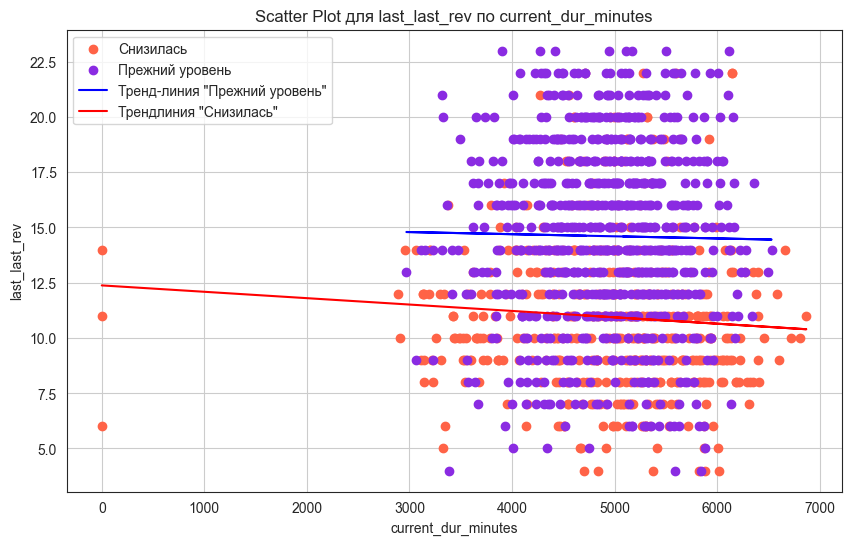

In [99]:
plot_scatter_new(some_df=df_market,
                 feat1=feat1,
                 feat2=feat2,
                 target_feature=target_feature)

In [ ]:
"""
target_feature = 'consum_activity'

for pair_of_cols in list_of_pairs:
    feat1= pair_of_cols[0]
    feat2 = pair_of_cols[1]

    plot_scatter_new(some_df=df_market,
                 feat1=feat1,
                 feat2=feat2,
                 target_feature=target_feature)    

    break

"""